# Least Square

In [1]:
using LinearAlgebra
using VMLS 

In [3]:
A = [2 0; -1 1; 0 2]
b = [1; 0; -1]

3-element Vector{Int64}:
  1
  0
 -1

In [7]:
x = A\b

# compute the pseudo inverse
Adagger = inv(A'*A)*A'

2×3 Matrix{Float64}:
 0.416667   -0.166667  0.0833333
 0.0833333   0.166667  0.416667

In [8]:
x = Adagger*b

2-element Vector{Float64}:
  0.33333333333333337
 -0.33333333333333337

In [9]:
Adagger = pinv(A)

2×3 Matrix{Float64}:
 0.416667   -0.166667  0.0833333
 0.0833333   0.166667  0.416667

In [10]:
x_hat = A \ b

2-element Vector{Float64}:
  0.3333333333333332
 -0.3333333333333334

In [13]:
# How much A * xhat is close to b
# Answer:
# 1) compute the distance vector between A*xhat and b 
# 2) Compute the length or the norm of the distance vector
using LinearAlgebra
using VMLS

# Compute the deviation (aka residual) vector
rhat = A * x_hat - b
distance = norm(rhat)

0.816496580927726

In [16]:
using Printf
for i = 1:100
    x = randn(2)
    r = A*x-b
    d = norm(r)
    
    @printf("d = %.3f, distance = %.3f\n", d, distance)
end

d = 1.618, distance = 0.816
d = 3.616, distance = 0.816
d = 3.688, distance = 0.816
d = 1.662, distance = 0.816
d = 5.563, distance = 0.816
d = 2.869, distance = 0.816
d = 1.134, distance = 0.816
d = 3.709, distance = 0.816
d = 1.659, distance = 0.816
d = 2.608, distance = 0.816
d = 2.093, distance = 0.816
d = 3.209, distance = 0.816
d = 1.885, distance = 0.816
d = 3.608, distance = 0.816
d = 3.530, distance = 0.816
d = 4.930, distance = 0.816
d = 5.530, distance = 0.816
d = 2.959, distance = 0.816
d = 3.710, distance = 0.816
d = 1.211, distance = 0.816
d = 2.263, distance = 0.816
d = 1.323, distance = 0.816
d = 2.278, distance = 0.816
d = 6.161, distance = 0.816
d = 2.275, distance = 0.816
d = 7.128, distance = 0.816
d = 1.698, distance = 0.816
d = 3.568, distance = 0.816
d = 1.706, distance = 0.816
d = 3.142, distance = 0.816
d = 4.939, distance = 0.816
d = 3.007, distance = 0.816
d = 2.766, distance = 0.816
d = 3.461, distance = 0.816
d = 1.676, distance = 0.816
d = 3.661, distance 

# Least squares solution formula

$
\hat{x} = A^{\dagger}b = (A^TA)^{-}A^T*b
$

In [17]:
A

3×2 Matrix{Int64}:
  2  0
 -1  1
  0  2

In [18]:
b

3-element Vector{Int64}:
  1
  0
 -1

In [21]:
xhat = inv(A'A)A'b 

2-element Vector{Float64}:
  0.33333333333333337
 -0.33333333333333337

In [22]:
xhat = pinv(A)b

2-element Vector{Float64}:
  0.3333333333333333
 -0.3333333333333335

# Illumination

A set of **n** lamps illuminates an area of **m** regions

- let $b_i$ denote the lighting level in region **i**
- the m-vector **b** gives the illumination levels across all regions
- let **x[i]** denote the power at which lamp **i** operates, i.e. the n-vector **x** gives the set of lamp powers

Then vector **b** of illumination levels is a linear function of the lamp powers **x**

$ b = A*x $

for some m x n matrix A

Consider **A**
- $ A_{ij} $ is illumination in region **i** if lamp **j** is on with power 1, other lamps are off 
- $ A_{ij} $ is contribution of illumination from lamp **j** to region **i**
- The column A_j gives the illumination pattern for lamp **j** across all regions
  > We assume taht A has linearly independent columns, and therefore is tall.
- The **ith** row of A gives the sensitivity of region **i** to the **n** lamp powers

### **Goal**

Find lamp powers $\hat{x}$  that result in a desired illumination pattern $b = \alpha\bold{1}:$ uniform illumination with value $\alpha$ across all **n** regions

In other words, we seek $\hat{x}$ so that $A\hat{x} \approx b$

Use least squares to find $\hat{x}$ that minimizes the sum square deviation from the desired illumination

$ ||A\hat{x} - b||^2 $

This gives the lamp power levels

$\hat{x} = A^{\dagger}b$



In [24]:
# number of lamps
n = 10

lamps = [ # x, y positions of lamps and height above floor
            4.1 20.4 4;
            14.1 21.3 3.5;
            22.6 17.1 6;
            5.5 12.3 4.0;
            12.2 9.7 4.0;
            15.3 13.8 6;
            21.3 10.5 5.5;
            3.9 3.3 5.0;
            13.1 4.3 5.0;
            20.3 4.2 4.5 ]

10×3 Matrix{Float64}:
  4.1  20.4  4.0
 14.1  21.3  3.5
 22.6  17.1  6.0
  5.5  12.3  4.0
 12.2   9.7  4.0
 15.3  13.8  6.0
 21.3  10.5  5.5
  3.9   3.3  5.0
 13.1   4.3  5.0
 20.3   4.2  4.5

In [33]:
# reshape(collect(0.5:1:8) * ones(1, 8), 64, 1)
reshape(ones(8, 1) * collect(0.5:1:8)', 64, 1)


64×1 Matrix{Float64}:
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 1.5
 1.5
 ⋮
 6.5
 7.5
 7.5
 7.5
 7.5
 7.5
 7.5
 7.5
 7.5

In [36]:
# grid size
N = 25

# number of regions
m = N^2

# Construct m x2 matrix with coordinates of region centers
pixels = hcat(
    reshape( collect(0.5: 1 : N) * ones(1, N), m, 1),
    reshape( ones(N, 1) * collect(0.5: 1: N)', m, 1)
)


625×2 Matrix{Float64}:
  0.5   0.5
  1.5   0.5
  2.5   0.5
  3.5   0.5
  4.5   0.5
  5.5   0.5
  6.5   0.5
  7.5   0.5
  8.5   0.5
  9.5   0.5
  ⋮    
 16.5  24.5
 17.5  24.5
 18.5  24.5
 19.5  24.5
 20.5  24.5
 21.5  24.5
 22.5  24.5
 23.5  24.5
 24.5  24.5

In [39]:
# Matrix A maps lamp powers to pixel intensities
# Matrix A maps lamp powers to region illumination
# A is mxn matrix
# A[i, j] is inversely proportional to the square distance from lamp j to pixel i 

A = zeros(m, n)
for i=1:m
    for j = 1:n
        distance_vector = lamps[j, :] - [pixels[i, :]; 0]
        A[i, j] = 1.0 / norm(distance_vector)^2
    end
end

A = (m/sum(A))*A

625×10 Matrix{Float64}:
 0.0245215  0.0165451  0.0130266  …  0.234705   0.0525778  0.0244634
 0.0248846  0.0172632  0.0137703     0.269972   0.0598904  0.026901
 0.0251367  0.0179842  0.0145631     0.299452   0.068649   0.0297079
 0.0252708  0.0187006  0.0154071     0.315786   0.0791863  0.0329588
 0.0252831  0.019404   0.0163038     0.313883   0.0918953  0.0367477
 0.0251731  0.0200847  0.017254   …  0.294376   0.107211   0.0411927
 0.0249442  0.020732   0.0182577     0.263155   0.125553   0.0464432
 0.0246026  0.0213347  0.0193134     0.227531   0.147188   0.0526895
 0.0241577  0.0218812  0.0204184     0.19298    0.171962   0.0601739
 0.0236211  0.0223601  0.0215678     0.16232    0.198873   0.0692052
 ⋮                                ⋱                        
 0.0558553  0.368882   0.0814325     0.0164576  0.0234389  0.0233245
 0.0490697  0.306048   0.0892431     0.0158036  0.0230348  0.0236742
 0.0433898  0.249006   0.0968757     0.0151555  0.0225463  0.0239242
 0.0386003  0.20176 

In [40]:
b = ones(m, 1)
xhat = A\b

10×1 Matrix{Float64}:
 1.4621101798266414
 0.7879743262131843
 2.9664104724031883
 0.7435804226879906
 0.08317333038944939
 0.21263944602371915
 0.21218407925533114
 2.0511481462520043
 0.9076031545599363
 1.472224642516008

In [42]:
r = A*xhat - b
norm(r)/sqrt(m)

0.14039048134276055

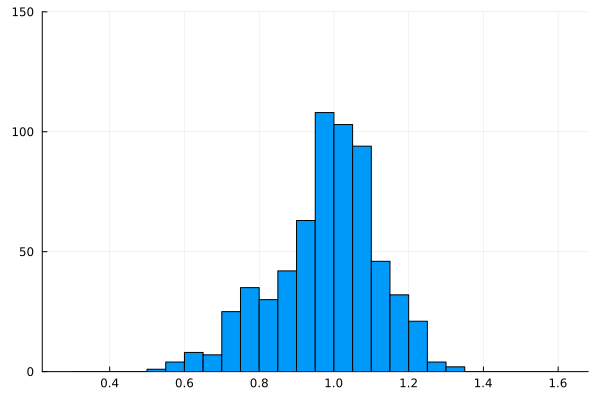

In [43]:
using Plots
histogram(A*xhat, bins=(0.3:0.05:1.6), legend = false, ylim=(0, 150))

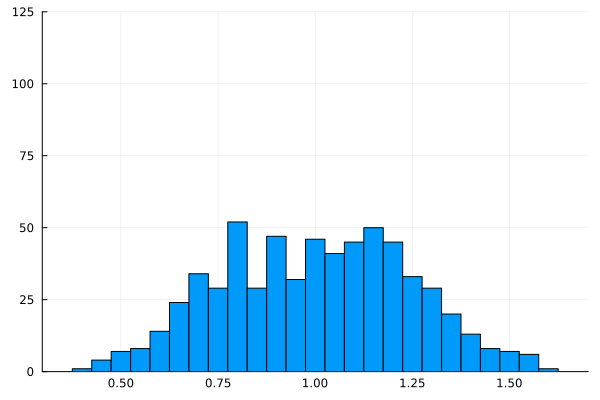

In [45]:
# Compute pixel intensity if all lamp powers are 1
xhat = ones(n)

pixel_intensity = A*xhat 
histogram(A*xhat, bins=(0.375:0.05:1.625), legend=false, ylim=(0, 125))

In [46]:
r = A*xhat-b
rms(r)

0.24174131853807876